In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
density=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_density30_1.2_idm_pos800_f100_inter100_w1800.npy')
flow=np.load('/home/tianyu/code/SUMO-changing-lane-agent/Main7500Merge1250omar_average_flow30_1.2_idm_pos800_f100_inter100_w1800.npy')


In [3]:
200*density

array([ 0.        ,  0.16031878, 12.30469836, 14.29895283, 14.29709943,
       14.29524604, 14.29709943, 14.29709943, 14.29895283, 14.29895283,
       14.29895283, 14.29709943, 14.29524604, 14.29709943, 14.29709943,
       14.29895283, 14.29895283, 14.29895283, 14.29709943, 14.29524604,
       14.29709943, 14.29709943, 14.29895283, 14.29895283, 14.29895283,
       14.29709943, 14.29524604, 14.29709943, 14.29709943, 14.29895283,
       14.29895283, 14.29895283, 14.29709943, 14.29524604, 14.29709943,
       14.29709943, 14.29895283, 14.29895283, 14.29895283, 14.29709943,
       14.29524604, 14.29709943, 14.29709943, 14.29895283, 14.29895283,
       14.29895283, 14.29709943, 14.29524604, 14.29709943, 14.29709943,
       14.29895283, 14.29895283, 14.29895283, 14.29709943, 14.29524604,
       14.29709943, 14.29709943, 14.29895283, 14.29895283, 14.29895283,
       14.29709943, 14.29524604, 14.29709943, 14.29709943, 14.29895283,
       14.29895283, 14.29895283, 14.29709943, 14.29524604, 14.29

In [4]:
5000*flow

array([   0.        ,    0.        ,  708.33333333, 2150.        ,
       2150.        , 2150.        , 2133.33333333, 2150.        ,
       2133.33333333, 2133.33333333, 2150.        , 2150.        ,
       2150.        , 2133.33333333, 2150.        , 2133.33333333,
       2133.33333333, 2150.        , 2150.        , 2150.        ,
       2133.33333333, 2150.        , 2133.33333333, 2133.33333333,
       2150.        , 2158.33333333, 2150.        , 2133.33333333,
       2150.        , 2133.33333333, 2133.33333333, 2150.        ,
       2150.        , 2150.        , 2133.33333333, 2150.        ,
       2133.33333333, 2133.33333333, 2150.        , 2150.        ,
       2150.        , 2133.33333333, 2150.        , 2133.33333333,
       2133.33333333, 2150.        , 2150.        , 2158.33333333,
       2133.33333333, 2150.        , 2133.33333333, 2133.33333333,
       2150.        , 2150.        , 2150.        , 2133.33333333,
       2150.        , 2133.33333333, 2133.33333333, 2150.     

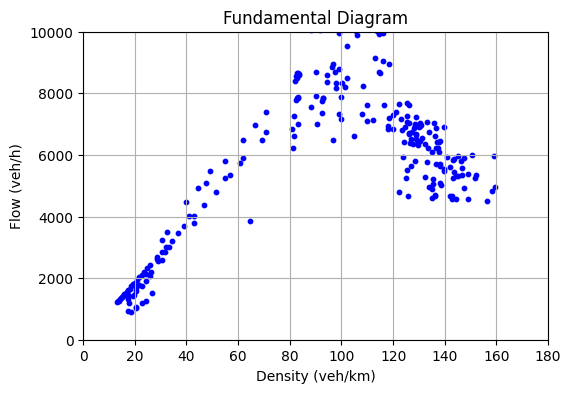

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def plot_fundamental_diagram(*data_sets):
    plt.figure(figsize=(6, 4))
    
    for data, target_speed in data_sets:
        density_data, flow_data = zip(*data)
        
        def func(x, a, b, c, d):
            return a * x**3 + b * x**2 + c * x + d
        
        params, covariance = curve_fit(func, density_data, flow_data)
        a, b, c, d = params
        x_fit = np.linspace(min(density_data), max(density_data), 100)
        y_fit = func(x_fit, a, b, c, d)
        
        plt.scatter(density_data, flow_data, label='Target Speed: {}m/s'.format(target_speed), s=10,color='blue')
        # plt.plot(x_fit, y_fit)
    
    plt.xlabel('Density (veh/km)')
    plt.ylabel('Flow (veh/h)')
    plt.xlim(0,180)
    plt.ylim(0,10000)
    plt.title('Fundamental Diagram')
    # plt.legend()
    plt.grid(True)
    plt.show()

# Given data as a list of tuples (density, flow)
data_20 = [(146.54531289333931, 5567.783099706185), (144.46898118293268, 5300.909507185094), (138.18068254756585, 5099.393005070042), (146.23940355267865, 5805.87554907283), (159.09064387291008, 5980.376483494847), (135.32946576996136, 5210.316658629334), (141.9242740247391, 4673.518469091295), (159.39410983633357, 4964.114073799514), (138.33489554175384, 5035.505379455028), (143.4597548845754, 5864.9144730486), (146.59657881245857, 5358.242335750879), (151.96663476626918, 5349.825915173531), (150.53191053066993, 5982.83914732228), (133.03012714553319, 5776.595381390706), (147.50106317051987, 4916.416472425896), (147.36324941922294, 5883.86093051863), (136.26820023742985, 4697.553350978849), (138.24568590855034, 5713.197650591962), (143.1222079787681, 5252.701400989788), (158.31269753371703, 4825.484725342285), (139.7714875025637, 5556.311427902253), (156.3738938771068, 4519.596781589367), (148.92573419926538, 4574.545163330239), (151.80246836222233, 5256.872064354555), (143.34656336535738, 5851.364691175615)
,(126.91711316238239, 5627.5053929526275), (141.9053574623216, 5616.177664634278), (141.02875398156138, 5930.143415677282), (133.70257787209462, 4947.003662160351), (123.78490740429221, 5927.54591899423), (134.9790276317328, 4598.638472405637), (132.15577992875097, 5272.564695568557), (137.98281725261626, 5648.514891996582), (142.78158103840883, 4583.059076506385), (122.1629723617672, 4780.064123487396), (145.25806103599473, 5330.947841705197), (128.44881053974586, 5802.686559768779), (125.37640176132146, 5496.81278281743), (125.60722891128951, 4650.58493620452), (135.55310062120307, 5046.586747294261), (139.5777130590555, 5477.614047357714), (144.43190403095167, 4554.875025481359), (125.05027329913193, 5242.282054826536), (148.8008186275413, 5374.522143571654), (143.615146334804, 5435.897316516986), (142.71290270285064, 4666.160846439221), (136.60965949761695, 5695.254309266564), (136.2903548672166, 4662.340756794149), (135.1818991754316, 4878.188657907788), (144.96590151386476, 5977.657455304998)
,(81.08807428, 6235.05086094), (124.04437853, 6416.28676754), (129.60998276, 6327.22340167), (90.35554372, 7019.32252689), (104.73130036, 6603.58417155), (92.29326706, 7372.46088279), (99.09593124, 7330.07943159), (83.14861688, 7012.4089258), (81.61404498, 6603.24216515),(102.14907246918952, 8507.062330338238), (96.41944000296245, 8851.983873660924), (98.02004336566993, 8187.00416974463), (101.44001353664402, 8196.517758410138), (114.56966920603074, 8703.54216707016), (98.06583955274895, 8322.161401696214), (97.63027459268208, 8686.919634320819), (118.21449709224439, 8955.341647517169), (81.84337289361171, 8397.581770328776), (90.31205203580907, 7908.848610985906),(108.18600311409494, 8225.478653621522), (99.08138580124117, 8802.402034207409), (100.28736896891499, 8322.685080476971), (107.952745116931, 7333.525236675922), (116.29987368547896, 7609.268247502377), (94.42764367230079, 8373.496587640631), (83.73915544300816, 8636.835571758853), (118.58310300262859, 7185.251626570307), (94.20870346883096, 8590.075614703626), (92.42698860960569, 7745.173026902468),(92.98299523, 7862.27549077), (92.90050865, 7840.3707714), (82.93591294, 7864.21186656), (83.31252929, 7866.47026248), (83.18192554, 7836.10654907), (82.51986222, 7793.62206852), (70.83969039, 6733.97643203), (61.92607499, 5895.54903908), (54.88649675, 5266.08873377), 
            (100, 7871), (110, 7618), (96.90364017, 6468.53273042),
           (88.04224448, 7544.81710469), (69.29921737, 6476.67897324), (60.63957379, 5725.15547959),
           (56.87765776, 5339.34164703), (51.24759058, 4797.06444385), (46.63886743, 4362.07251701),
           (42.80092839, 4007.00076398), (42.88689764, 3797.78216162), (36.77481485, 3454.38064517),
           (34.35922597, 3218.5035864), (32.24912183, 3019.53759334), (30.38865916, 2843.96379703),
           (28.72952617, 2686.6364173), (30.50787719, 2592.48971623), (25.91789094, 2426.01099364),
           (24.7135867, 2315.69757321), (23.6141723, 2212.19384964), (22.61358579, 2115.48564793),
           (21.69676418, 2034.32500745), (20.85084884, 1926.41118093), (20.0741865, 1853.19376172),
           (19.34840767, 1801.11114324), (18.67847211, 1737.7139321), (18.05648093, 1662.48759752),
           (17.47398418, 1615.71494332), (16.92767533, 1555.72243507), (16.41773809, 1512.72892732),
           (15.93737574, 1468.55569218), (15.48493502, 1427.99502482), (15.06041594, 1390.83137059),
           (14.65940982, 1342.15163144), (14.2802634, 1314.32193759), (13.91691475, 1271.57359497),
           (13.57560949, 1247.38875755), (13.25157156, 1215.8135853)]


# 给定的density和flow数据
density_25 = np.array([145, 140,100,90,84.00136457, 83.41672286, 83.48763238, 82.66638443, 66.45053615,
                       64.61224715, 47.41748181, 48.98877437, 44.59810028, 39.7659336 ,
                       41.01636995, 39.21273586, 32.3307428 , 30.35477411, 33.26902938,
                       31.60245457, 28.74478679, 29.11370777, 26.49175991, 26.35855886,
                       25.9797167 , 24.26555696, 24.49980709, 24.2062136 , 22.95191901,
                       22.76488637, 21.52253394, 20.44700435, 20.46482574, 20.445902  ,
                       20.32262213, 19.51643425, 19.45249775, 16.97532565, 17.3253229 ,
                       17.49508534, 18.45890977, 17.37125429, 17.48075474, 17.79510922])

flow_25 = np.array([5918,5818,7739,7618,7801.40719052, 7810.38473862, 7846.62307565, 7728.56182849,
                    6326.75414185, 3510.50383245, 4632.87446086, 4981.02159921,
                    4489.03401816, 4077.68658297, 3647.07775317, 3345.75082156,
                    3185.53463562, 2940.33270275, 2734.88762607, 2595.70311014,
                    2375.58019837, 2328.05170136, 1386.73573536, 1988.68787248,
                    1881.56872811, 1931.73788405, 1739.00404197, 1130.25718049,
                    1597.23059595, 1074.59745091, 1623.28982447, 1435.99857928,
                    1527.03601042,  975.68187369,  932.72275757, 1334.12434066,
                    1296.08782335, 1385.70615047, 1323.70550745, 1281.96127945,
                    832.3409513 ,  833.1371275 , 1211.8764022 , 1087.31787422])

# 给定的density和flow数据
density_30 = np.array([137.62975374, 135.65217935, 137.29781941, 137.88205242,
       138.11436969, 136.39833986, 136.14053263, 130.23140734,
       130.59024487, 136.97622093, 133.22999173, 139.65455229,
       134.93979314, 132.30277076, 136.54977961,131.21301974, 126.12308407, 127.70557791, 128.87435128,
       127.40374583, 129.53108269, 130.34040703, 130.48905839,
       126.56339237, 133.78629697, 126.76383074, 128.91597923,
       126.13218746, 125.31163589, 133.56772161,128.80004685, 123.13958422, 126.03263394, 128.0846964 ,
       122.13344954, 123.41803841, 120.06418261, 125.25230784,
       128.34042316, 129.62723757, 128.61694119, 128.70158556,
       126.04876939, 125.38245372, 124.62699835,80.66170353, 114.72982472, 116.24756985, 112.38731106,
       117.81431629,  90.17339234, 110.01824774, 120.94429104,
        81.61404498,103.77304823, 100.57864273, 113.35163637, 106.4256277 ,
       102.18332449, 105.77514699, 109.76351458, 112.22528471,
       102.08638874, 119.83525865, 105.87662991, 113.5759541 ,
       103.7208192 , 114.21279212, 117.19840991,86.43070517,  84.50296736,  96.94675452, 115.69458049,
       114.10137667,  89.03163375, 108.00058355,  99.10410561,
        88.48318697,  88.34436238,  89.23057708, 116.0674591 ,
       104.47567012, 106.08362222,  94.78191443,113.38531755,  88.13996846,  91.61434768,  96.25748091,
       100.94898699,  91.91946353, 112.90327595, 114.55347619,
        96.79239557, 102.00227086,83.17649879, 83.08315872, 82.93591294, 83.32048852, 83.16709243,
       82.52275648, 70.83969039, 61.92607499, 54.88649675,130,120,118,100,83.64283739, 83.04480969, 83.09835361, 82.66638443, 66.45053615,
                       64.61224715, 47.41748181, 48.98877437, 44.59810028, 39.7659336 ,
                       41.01636995, 39.21273586, 32.3307428 , 30.35477411, 33.26902938,
                       31.60245457, 28.74478679, 29.11370777, 26.49175991, 26.35855886,
                       25.9797167 , 24.26555696, 24.49980709, 24.2062136 , 22.95191901,
                       22.76488637, 21.52253394, 20.44700435, 20.46482574, 20.445902  ,
                       20.32262213, 19.51643425, 19.45249775, 16.97532565, 17.3253229 ,
                       17.49508534, 18.45890977, 17.37125429, 17.48075474, 17.79510922])

flow_30 = 1.1*np.array([5830.18437725, 6392.22438338, 5647.66862848, 5530.64796258,
       5858.10025716, 6245.60487484, 6022.13732455, 6302.24321136,
       6347.69452046, 5832.35017966, 6436.54436362, 6270.73482104,
       5537.81409004, 5767.12169177, 5667.1660617,5960.10189346, 6112.80418149, 5784.62281403, 6079.82462787,
       6133.01147013, 5830.5786439 , 5878.95717261, 6382.89256973,
       5818.34371438, 6138.29626924, 5913.31270278, 5913.50745739,
       6403.08629492, 6431.70356369, 5670.83258616,6560.27169933, 6504.02132422, 6059.65832688, 6252.71308044,
       6953.45177375, 6185.88256043, 6641.92281167, 6595.28287591,
       6304.85660911, 6332.87884423, 6364.48019525, 6034.8892454 ,
       6920.57949755, 6978.91465874, 6266.75031332,6206.59726237, 7861.49607775, 8236.47311048, 6496.85267339,
       6319.80108597, 7907.65768457, 6447.45824103, 6734.6826517 ,
       6603.24216515,9472.18381262, 9685.5358627 , 9993.55395165, 9144.66329899,
       9486.95401196, 9118.18717257, 9798.94154215, 9847.2077864 ,
       9371.55816714, 9410.33791149, 9661.38390413, 9118.45871566,
       9378.6120831 , 9543.69231458, 9294.54537816,9248.09274347, 9483.36534848, 9982.05234872, 9890.00017388,
       9689.70482819, 9707.58373737, 9204.65171343, 9047.35891684,
       9786.28450486, 9139.44618775, 9452.38084413, 9053.46768128,
       9802.4696417 , 9006.78517577, 9672.48695263,9264.3526991 , 9751.92601641, 9132.90076065, 9727.96392637,
       9917.36914068, 9441.3868363 , 8319.57031054, 9027.69173632,
       8143.53159802, 8663.64484143,7836.3604425 , 7811.13392162, 7864.21186656, 7868.38403774,
       7829.39740786, 7786.68253014, 6733.97643203, 5895.54903908,
       5266.08873377,6281,6210,6208,6519,7803.06941373, 7809.21362166, 7840.86751063, 7728.56182849,
                    6326.75414185, 3510.50383245, 4632.87446086, 4981.02159921,
                    4489.03401816, 4077.68658297, 3647.07775317, 3345.75082156,
                    3185.53463562, 2940.33270275, 2734.88762607, 2595.70311014,
                    2375.58019837, 2328.05170136, 1386.73573536, 1988.68787248,
                    1881.56872811, 1931.73788405, 1739.00404197, 1130.25718049,
                    1597.23059595, 1074.59745091, 1623.28982447, 1435.99857928,
                    1527.03601042,  975.68187369,  932.72275757, 1334.12434066,
                    1296.08782335, 1385.70615047, 1323.70550745, 1281.96127945,
                    832.3409513 ,  833.1371275 , 1211.8764022 , 1087.31787422])


# Given density and flow data for data50
density_50 = np.array([134.13826911, 140.67793881, 148.47187518, 137.75686484,
       133.24814225, 132.32165026, 138.57040634, 138.54731055,
       142.80088188, 140.54432821, 139.79836825, 139.12551605,
       132.30876397, 145.61691516, 147.35627049,150,130,120,110,108,100,90,83.65622337, 83.06036637, 83.11788991, 82.30894259, 66.05619243,
                       64.24442852, 47.41748181, 48.98877437, 44.59810028, 39.7659336 ,
                       41.01636995, 39.21273586, 32.3307428 , 30.35477411, 33.26902938,
                       31.60245457, 28.74478679, 29.11370777, 26.49175991, 26.35855886,
                       25.9797167 , 24.26555696, 24.49980709, 24.2062136 , 22.95191901,
                       22.76488637, 21.52253394, 20.44700435, 20.46482574, 20.445902  ,
                       20.32262213, 19.51643425, 19.45249775, 16.97532565, 17.3253229 ,
                       17.49508534, 18.45890977, 17.37125429, 17.48075474, 17.79510922])

flow_50 = 1.2*np.array([6190,7298,6581,6681,7687,7571,7617,7794.48699449, 7811.66204513, 7846.15641577, 7745.51724685,
                    6327.67844742, 3170.86050407, 4632.87446086, 4981.02159921,
                    4489.03401816, 4077.68658297, 3647.07775317, 3345.75082156,
                    3185.53463562, 2940.33270275, 2734.88762607, 2595.70311014,
                    2375.58019837, 2328.05170136, 1386.73573536, 1988.68787248,
                    1881.56872811, 1931.73788405, 1739.00404197, 1130.25718049,
                    1597.23059595, 1074.59745091, 1623.28982447, 1435.99857928,
                    1527.03601042,  975.68187369,  932.72275757, 1334.12434066,
                    1296.08782335, 1385.70615047, 1323.70550745, 1281.96127945,
                    832.3409513 ,  833.1371275 , 1211.8764022 , 1087.31787422])


# Create a list of tuples containing density and flow values for data50
data_50 = list(zip(density_50, flow_50))

# 将数据组合成元组的列表
data_30 = list(zip(density_30, flow_30))

# 将数据组合成元组的列表
data_25 = list(zip(density_25, flow_25))
data_l_30=list(zip(200*density,5000*flow))

# Plot the fundamental diagram using the given data
plot_fundamental_diagram((data_20, 20),(data_30,30))



In [6]:
import numpy as np

# Generate random sample points within the specified ranges
num_samples = 25  # Number of sample points you want to generate

# Generate random density values between 80 and 120
random_density = np.random.uniform(130, 160, num_samples)

# Generate random flow values between 7000 and 9000
random_flow = np.random.uniform(4500, 6000, num_samples)

# Combine random density and flow values into a list of tuples
random_data = list(zip(random_density, random_flow))

# Print the generated random data
print(random_data)


[(141.45364882341673, 5074.9221745154755), (139.9449920068638, 5785.466769728662), (146.94890382993626, 4945.60320178293), (149.27308258639442, 5622.963666504835), (142.0833080993899, 5843.625465852516), (158.70804620251528, 5968.818027370343), (150.86172402045753, 5953.689463910209), (149.6357275210575, 4539.361068969845), (154.20483020951906, 4575.108507783393), (149.19607066989613, 5159.656687808309), (157.2112011437598, 5271.142302212565), (135.35000786903552, 4728.806470518946), (145.67908001964292, 5645.597702026661), (138.74351817311071, 4927.669812422829), (147.26740356590565, 4954.712914636994), (147.05841513762002, 5336.737765399369), (149.06939847366698, 5635.348372739109), (146.17318101100997, 4546.471546837465), (143.80620114691527, 5294.940991875612), (153.49562010468458, 4507.197179821649), (154.12028348353857, 5665.527887772487), (134.21048342326202, 5792.020393335941), (143.20499738452168, 5039.376068571397), (138.5287475950942, 5392.367242131516), (156.46872590621695,

In [7]:
random_density

array([141.45364882, 139.94499201, 146.94890383, 149.27308259,
       142.0833081 , 158.7080462 , 150.86172402, 149.63572752,
       154.20483021, 149.19607067, 157.21120114, 135.35000787,
       145.67908002, 138.74351817, 147.26740357, 147.05841514,
       149.06939847, 146.17318101, 143.80620115, 153.4956201 ,
       154.12028348, 134.21048342, 143.20499738, 138.5287476 ,
       156.46872591])

In [8]:
random_flow

array([5074.92217452, 5785.46676973, 4945.60320178, 5622.9636665 ,
       5843.62546585, 5968.81802737, 5953.68946391, 4539.36106897,
       4575.10850778, 5159.65668781, 5271.14230221, 4728.80647052,
       5645.59770203, 4927.66981242, 4954.71291464, 5336.7377654 ,
       5635.34837274, 4546.47154684, 5294.94099188, 4507.19717982,
       5665.52788777, 5792.02039334, 5039.37606857, 5392.36724213,
       4585.36502807])

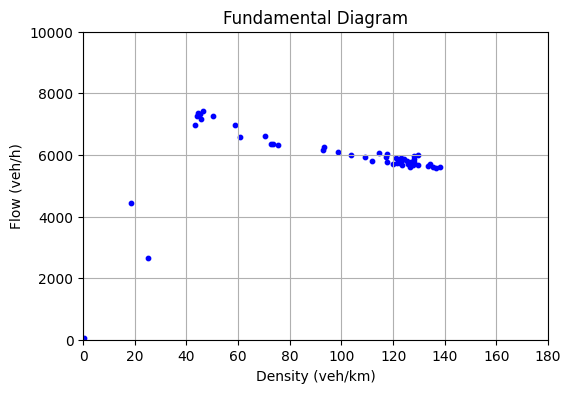

In [4]:
plot_fundamental_diagram((3*np.array(data_l_30),30))

In [10]:
3*np.array(data_l_30)

array([[0.00000000e+00, 0.00000000e+00],
       [4.80956353e-01, 0.00000000e+00],
       [3.69140951e+01, 2.12500000e+03],
       [4.28968585e+01, 6.45000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28857381e+01, 6.45000000e+03],
       [4.28912983e+01, 6.40000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.28968585e+01, 6.45000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28857381e+01, 6.45000000e+03],
       [4.28912983e+01, 6.40000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.28968585e+01, 6.45000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28857381e+01, 6.45000000e+03],
       [4.28912983e+01, 6.40000000e+03],
       [4.28912983e+01, 6.45000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.28968585e+01, 6.40000000e+03],
       [4.289685

In [5]:
flow_data = [pair[1] for pair in data_l_30]


In [9]:
type(data_l_30[0:3138:10])

list

Text(0, 0.5, 'flow(veh/h)')

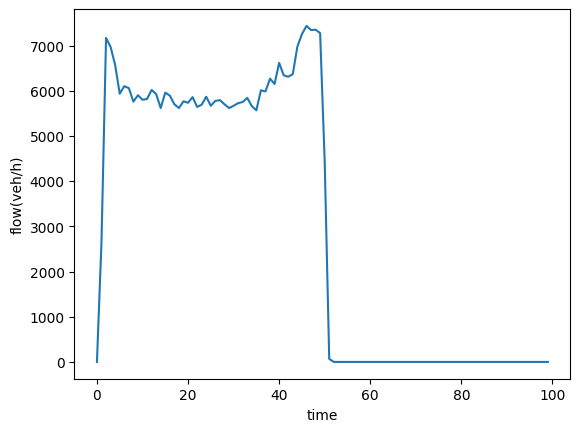

In [6]:
plt.plot(3*np.array(flow_data))
plt.xlabel('time')
plt.ylabel('flow(veh/h)')

In [ ]:
flow_data[-10:-1]

In [ ]:
max(1.5*np.array(flow_data))

In [ ]:
data_l_30

In [ ]:
np.save('data_l_30onlyM.npy',data_l_30)